This is a priliminary analysis of a dataset from bank. The dataset has customer information such as balancd, tenure, gender, credit scort, etc. It also has a record of whether the customer stayed or left the back. This analysis focuses on visualizing feature in order to understand and prepare the data for modeling and predictions.

In [170]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xlrd


In [171]:
#read data from file

ChurnModeling = pd.read_excel('churn-Modelling.xlsx')

ChurnModeling.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

Scatter Plots of credit scores

In [172]:
# Scatter plot of vredit scores
plt.plot(ChurnModeling.CreditScore)

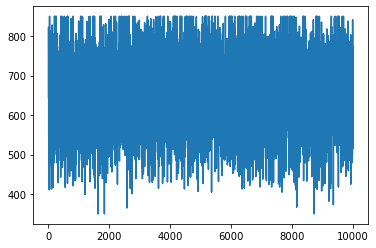

In [173]:
plt.plot(ChurnModeling[(ChurnModeling["Gender"] == "Male")].CreditScore)

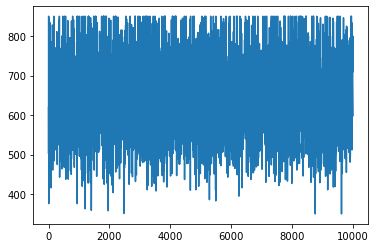

In [174]:
plt.plot(ChurnModeling[(ChurnModeling["Gender"] == "Female")].CreditScore)

Analyse churning by evaluating the Exited feature. 
Start by evaluating Gender feature aganist Exited Feature with bar charts.

In [175]:
male_exited = ChurnModeling[(ChurnModeling["Gender"] == "Male") & (ChurnModeling["Exited"] == 1)]
len(male_exited)


898

In [176]:
female_exited = ChurnModeling[(ChurnModeling["Gender"] == "Female") & (ChurnModeling["Exited"] == 1)]
len(female_exited)

1139

In [177]:
width = 0.35       # the width of the bars: can also be len(x) sequence
labels = ["Male","Female"]
exited =[len(male_exited),len(female_exited)]
stayed =[(len(ChurnModeling["Exited"]) - len(male_exited)) , (len(ChurnModeling["Exited"]) - len(female_exited))]

print(exited)

[898, 1139]


Bar chart showing the number customers by gender who left the bank

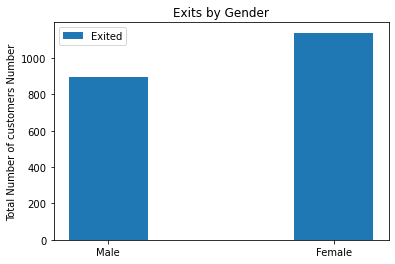

In [178]:
fig, ax = plt.subplots()

ax.bar(labels, exited, width, label='Exited')
ax.set_ylabel('Total Number of customers Number')
ax.set_title('Exits by Gender')
ax.legend()


Bar chart showing the number customers by gender who left the bank vs those who stayed.
This graph shows both stayed and exited customer based on gender in one glance. However, it is hard to
see the difference clearly as the number of those who exited is very close(difference of 241 customers).

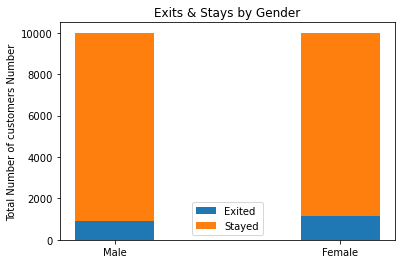

In [180]:
fig, ax = plt.subplots()

ax.bar(labels, exited, width, label='Exited')
ax.bar(labels, stayed, width, bottom=exited,label='Stayed')

ax.set_ylabel('Total Number of customers Number')
ax.set_title('Exits & Stays by Gender')
ax.legend()


The following pie chart shows the the information as above, but it shows the percenteges and this easier to see the difference.

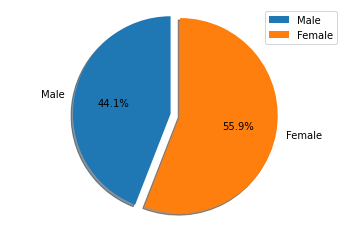

In [181]:
fig, ax = plt.subplots()
explode = (0.1, 0.0) 
ax.pie(exited, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax.legend()

The following nested pie chart shows two layers:
    Outter Layer : the total number of customer who exited vs who stayed
    Inner layer: Thecustomer who exited collor coded to distinguish those who stated or exited based on gender. 
        With each gender have a shade of its color to distinguish betwen genders.

[Text(0.5, 1.0, 'Nested Pie plot of exits and remains'), None]

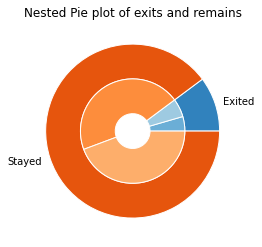

In [183]:
fig, ax = plt.subplots()
size = 0.4
vals = np.array([exited, stayed])
#print(vals)
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(2)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))
#print("vals.sum",vals.sum(axis=1))
ax.pie(vals.sum(axis=1), radius=1, labels=['Exited','Stayed'],colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))
#print("vals.flaten",vals.flatten())
ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Nested Pie plot of exits and remains')


Conclusions: The scatter plots did not show much , but binning them might reveal new information. 
Of the bar, pie and the nested pie chart, the pie chart shows more information. The nested pie chart needs more labeling to
help distniguish between genders. Further filteration such as tenure, has credit cart, number of products, can be analysed 
as well to find the best correlation. 